## <font color=blue>Contents<font/>

#########################################################################################################

1. **Jupyter setup <br>**
2. **Data Load From APIs <br>**
    * **API 1 - Movie related Qualitative Data**
    * **API 2 - Movie related Quantitative Data**
     <br><br>
3. **Convert API Data to DataFrame <br>**
    * **Convert API data into individual DataFrames**
    * **Merge individual DataFrames into Single DataFrame**
    * **Export Final DataFrame To CSV**

#########################################################################################################

## <font color=blue>Jupyter Setup<font/>

In [173]:
import requests
import sqlite3
import pandas as pd
import numpy as np
import json
import math
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 50)

In [174]:
df = pd.read_csv('Movies2018.csv', engine='python')

In [175]:
df.head()

,popularity,vote_count_x,vote_average_x,release_date,original_language_x,genre_ids,belongs_to_collection,budget,genres,production_companies,production_countries,revenue,id
0,82.250,16683,8.3,2018-04-25,en,"[28, 12, 878]","{'id': 86311, 'name': 'The Avengers Collection...",300000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...","[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2.046240e+09,299536
1,38.895,14192,7.4,2018-02-13,en,"[28, 12, 14, 878]","{'id': 529892, 'name': 'Black Panther Collecti...",200000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'iso_3166_1': 'US', 'name': 'United States o...",1.346739e+09,284054
2,31.957,6878,6.5,2018-06-06,en,"[28, 12, 878]","{'id': 328, 'name': 'Jurassic Park Collection'...",170000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 56, 'logo_path': '/cEaxANEisCqeEoRvODv...","[{'iso_3166_1': 'US', 'name': 'United States o...",1.303460e+09,351286
3,30.431,7607,7.5,2018-06-14,en,"[28, 12, 16, 10751]","{'id': 468222, 'name': 'The Incredibles Collec...",200000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 2, 'logo_path': '/wdrCwmRnLFJhEoH8GSfy...","[{'iso_3166_1': 'US', 'name': 'United States o...",1.241891e+09,260513
4,31.991,7849,6.8,2018-12-07,en,"[28, 12, 14]","{'id': 573693, 'name': 'Aquaman Collection', '...",160000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 429, 'logo_path': '/2Tc1P3Ac8M479naPp1...","[{'iso_3166_1': 'AU', 'name': 'Australia'}, {'...",1.143689e+09,297802


In [176]:
len(df)

10000

In [177]:
columns_to_keep = ['popularity', 'vote_count_x', 'vote_average_x', 'release_date', 'original_language_x',
                   'genre_ids', 'belongs_to_collection', 'budget', 'genres', 'production_companies', 
                   'production_countries', 'revenue', 'id']

df_reduced = df.loc[:, columns_to_keep]

In [178]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
popularity               10000 non-null float64
vote_count_x             10000 non-null int64
vote_average_x           10000 non-null float64
release_date             10000 non-null object
original_language_x      10000 non-null object
genre_ids                10000 non-null object
belongs_to_collection    278 non-null object
budget                   9996 non-null float64
genres                   9996 non-null object
production_companies     9996 non-null object
production_countries     9996 non-null object
revenue                  9996 non-null float64
id                       10000 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 1015.8+ KB


In [179]:
df_reduced.head()

,popularity,vote_count_x,vote_average_x,release_date,original_language_x,genre_ids,belongs_to_collection,budget,genres,production_companies,production_countries,revenue,id
0,82.250,16683,8.3,2018-04-25,en,"[28, 12, 878]","{'id': 86311, 'name': 'The Avengers Collection...",300000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...","[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2.046240e+09,299536
1,38.895,14192,7.4,2018-02-13,en,"[28, 12, 14, 878]","{'id': 529892, 'name': 'Black Panther Collecti...",200000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'iso_3166_1': 'US', 'name': 'United States o...",1.346739e+09,284054
2,31.957,6878,6.5,2018-06-06,en,"[28, 12, 878]","{'id': 328, 'name': 'Jurassic Park Collection'...",170000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 56, 'logo_path': '/cEaxANEisCqeEoRvODv...","[{'iso_3166_1': 'US', 'name': 'United States o...",1.303460e+09,351286
3,30.431,7607,7.5,2018-06-14,en,"[28, 12, 16, 10751]","{'id': 468222, 'name': 'The Incredibles Collec...",200000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 2, 'logo_path': '/wdrCwmRnLFJhEoH8GSfy...","[{'iso_3166_1': 'US', 'name': 'United States o...",1.241891e+09,260513
4,31.991,7849,6.8,2018-12-07,en,"[28, 12, 14]","{'id': 573693, 'name': 'Aquaman Collection', '...",160000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 429, 'logo_path': '/2Tc1P3Ac8M479naPp1...","[{'iso_3166_1': 'AU', 'name': 'Australia'}, {'...",1.143689e+09,297802


**`popularity`**

In [180]:
print(df_reduced.popularity.describe(),'\n')
print(type(df_reduced.popularity[0]),'\n')
print(sum(df_reduced.popularity.isna()),'\n')

count    10000.000000
mean         1.917143
std          3.052787
min          0.000000
25%          0.600000
50%          0.768000
75%          2.019000
max         82.250000
Name: popularity, dtype: float64 

<class 'numpy.float64'> 

0 



In [181]:
df_reduced.vote_count_x = df_reduced.vote_count_x.astype('float64')

print(df_reduced.vote_count_x.describe(),'\n')
print(type(df_reduced.vote_count_x[0]),'\n')
print(sum(df_reduced.vote_count_x.isna()),'\n')

count    10000.000000
mean        50.210500
std        432.659596
min          0.000000
25%          0.000000
50%          1.000000
75%          5.000000
max      16683.000000
Name: vote_count_x, dtype: float64 

<class 'numpy.float64'> 

0 



12 missing values

In [182]:
print(df_reduced.vote_average_x.describe(),'\n')
print(type(df_reduced.vote_average_x[0]),'\n')
print(sum(df_reduced.vote_average_x.isna()),'\n')

count    10000.000000
mean         4.438220
std          3.382769
min          0.000000
25%          0.000000
50%          5.600000
75%          7.000000
max         10.000000
Name: vote_average_x, dtype: float64 

<class 'numpy.float64'> 

0 



12 missing values

In [183]:
print(df_reduced.release_date.describe(),'\n')
print(type(df_reduced.release_date[0]),'\n')
print(sum(df_reduced.release_date.isna()),'\n')
df_reduced['release_date'].sort_values(ascending=True).head()
df_reduced['release_date'].sort_values(ascending=True).tail()

count          10000
unique           365
top       2018-01-01
freq             345
Name: release_date, dtype: object 

<class 'str'> 

0 



5443    2018-12-31
846     2018-12-31
1423    2018-12-31
8775    2018-12-31
9371    2018-12-31
Name: release_date, dtype: object

12 missing values

In [184]:
df_reduced['release_date'] = df_reduced['release_date'].map(lambda x: None if (x == '[]') else x)

In [185]:
df_reduced['release_date'] = pd.to_datetime(df_reduced['release_date'])

In [186]:
print(type(df_reduced.release_date[0]),'\n')

<class 'pandas._libs.tslibs.timestamps.Timestamp'> 



In [187]:
print(df_reduced.original_language_x.describe(),'\n')
print(type(df_reduced.original_language_x[0]),'\n')
print(sum(df_reduced.original_language_x.isna()),'\n')

print(df_reduced.original_language_x.value_counts(),'\n')

count     10000
unique       90
top          en
freq       5091
Name: original_language_x, dtype: object 

<class 'str'> 

0 

en    5091
fr     685
es     572
de     420
pt     298
      ... 
mt       1
lb       1
ak       1
ay       1
nn       1
Name: original_language_x, Length: 90, dtype: int64 



In [188]:
print(df_reduced.genre_ids.describe(),'\n')
print(type(df_reduced.genre_ids[0]),'\n')
print(sum(df_reduced.genre_ids.isna()),'\n')

print(df_reduced.genre_ids.value_counts(),'\n')

count     10000
unique      900
top          []
freq       1896
Name: genre_ids, dtype: object 

<class 'str'> 

0 

[]                    1896
[99]                  1522
[18]                  1210
[35]                   662
[27]                   314
                      ... 
[99, 80, 35]             1
[36, 27]                 1
[14, 28, 12, 18]         1
[16, 27, 9648, 14]       1
[28, 53, 18]             1
Name: genre_ids, Length: 900, dtype: int64 



In [189]:
print(df_reduced.genres.describe(),'\n')
print(type(df_reduced.genres[0]),'\n')
print(sum(df_reduced.genres.isna()),'\n')

print(df_reduced.genres.value_counts(),'\n')

count     9996
unique    1037
top         []
freq      1895
Name: genres, dtype: object 

<class 'str'> 

4 

[]                                                                                                      1895
[{'id': 99, 'name': 'Documentary'}]                                                                     1519
[{'id': 18, 'name': 'Drama'}]                                                                           1210
[{'id': 35, 'name': 'Comedy'}]                                                                           661
[{'id': 27, 'name': 'Horror'}]                                                                           314
                                                                                                        ... 
[{'id': 878, 'name': 'Science Fiction'}, {'id': 10749, 'name': 'Romance'}]                                 1
[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'name': 'Mystery'}, {'id': 18, 'name': 'Drama'}]               1
[{'id': 27, 'name'

In [190]:
from ast import literal_eval

In [191]:
df_reduced.genre_ids = df_reduced.genre_ids.fillna('[]')

In [192]:
df_reduced.genre_ids = df_reduced.genre_ids.map(lambda x: literal_eval(x))

In [193]:
df_reduced.genres= df_reduced.genres.fillna('[]')

In [194]:
df_reduced.genres = df_reduced.genres.map(lambda x: literal_eval(x))

In [195]:
df_reduced.production_companies= df_reduced.production_companies.fillna('[]')

In [196]:
df_reduced.production_companies = df_reduced.production_companies.map(lambda x: literal_eval(x))

In [220]:
df_reduced.belongs_to_collection= df_reduced.belongs_to_collection.fillna('{}')

In [222]:
df_reduced.belongs_to_collection = df_reduced.belongs_to_collection.map(lambda x: literal_eval(x))

In [197]:
df_reduced.production_countries= df_reduced.production_countries.fillna('[]')

In [198]:
df_reduced.production_countries = df_reduced.production_countries.map(lambda x: literal_eval(x))

In [199]:
df_reduced.genre_ids[0]

[28, 12, 878]

In [200]:
genre_series = df_reduced.genres

genre_list = []
for i in genre_series.dropna():
    if i == []:
        continue
    else:
        
        for j in i:
            genre_list.append(j)

In [201]:
genre_list

[{'id': 12, 'name': 'Adventure'},
 {'id': 28, 'name': 'Action'},
 {'id': 878, 'name': 'Science Fiction'},
 {'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'},
 {'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 878, 'name': 'Science Fiction'},
 {'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 16, 'name': 'Animation'},
 {'id': 10751, 'name': 'Family'},
 {'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 28, 'name': 'Action'},
 {'id': 18, 'name': 'Drama'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 99, 'name': 'Documentary'},
 {'id': 18, 'name': 'Drama'},
 {'id': 10402, 'name': 'Music'},
 {'id': 878, 'name': 'Science Fiction'},
 {'id': 28, 'name': 'Action'},
 {'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 28, 'name': 'Action'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 12, 'name': 'Adventure

In [202]:
genre_dict = {}
for i in genre_list:
    
    genre_dict[i['id']] = i['name']
    
    
    for k, v in i.items():
        genre_dict[k] = v

In [203]:
genre_dict

{12: 'Adventure',
 'id': 10751,
 'name': 'Family',
 28: 'Action',
 878: 'Science Fiction',
 14: 'Fantasy',
 16: 'Animation',
 10751: 'Family',
 18: 'Drama',
 35: 'Comedy',
 99: 'Documentary',
 10402: 'Music',
 53: 'Thriller',
 10752: 'War',
 10749: 'Romance',
 27: 'Horror',
 9648: 'Mystery',
 80: 'Crime',
 36: 'History',
 37: 'Western',
 10770: 'TV Movie'}

In [204]:
df_reduced.genre_ids[0]

[28, 12, 878]

In [205]:
def SortListElements(s):  
    
    s.sort()
    n_s = []
    
    if s == []:
        n_s = ['na']
    elif s in []:
        n_s = ['na']
    else:
        for ele in s:
            n_s.append(genre_dict[ele])
    return n_s
    
    
def SortlistToString(s):  

    n_s = SortListElements(s)

    # initialize an empty string 
    str1 = ""  
    
    # traverse in the string   
    for ele in n_s:  
        str1 += str(ele)+'|'
    
    # return string   
    return str1

In [206]:
df_reduced.genre_ids

0             [28, 12, 878]
1         [28, 12, 14, 878]
2             [28, 12, 878]
3       [28, 12, 16, 10751]
4              [28, 12, 14]
               ...         
9995                     []
9996                     []
9997     [99, 10752, 10751]
9998                     []
9999                     []
Name: genre_ids, Length: 10000, dtype: object

In [207]:
df_reduced.genre_ids = df_reduced.genre_ids.map(lambda x: SortlistToString(x), na_action='ignore')

In [208]:
df_reduced.genre_ids[0]

'Adventure|Action|Science Fiction|'

In [226]:
df_reduced.belongs_to_collection = df_reduced.belongs_to_collection.map(lambda x: {'name': 'na'} if (x == {}) else x)

In [227]:
print(df_reduced.belongs_to_collection.head(),'\n')
print(df_reduced.belongs_to_collection.describe(),'\n')
print(type(df_reduced.belongs_to_collection[0]),'\n')
print(sum(df_reduced.belongs_to_collection.isna()),'\n')

df_reduced.belongs_to_collection = df_reduced.belongs_to_collection.map(lambda x: x['name'], na_action='ignore')

print(df_reduced.belongs_to_collection.head(),'\n')

0    {'id': 86311, 'name': 'The Avengers Collection...
1    {'id': 529892, 'name': 'Black Panther Collecti...
2    {'id': 328, 'name': 'Jurassic Park Collection'...
3    {'id': 468222, 'name': 'The Incredibles Collec...
4    {'id': 573693, 'name': 'Aquaman Collection', '...
Name: belongs_to_collection, dtype: object 

count              10000
unique               252
top       {'name': 'na'}
freq                9722
Name: belongs_to_collection, dtype: object 

<class 'dict'> 

0 

0       The Avengers Collection
1      Black Panther Collection
2      Jurassic Park Collection
3    The Incredibles Collection
4            Aquaman Collection
Name: belongs_to_collection, dtype: object 



In [228]:
print(df_reduced.budget.head(),'\n')
print(type(df_reduced.budget[0]),'\n')

df_reduced.budget = df_reduced.budget.astype('float64')
print(df_reduced.budget.describe(),'\n')
print(sum(df_reduced.budget.isna()),'\n')

df_reduced.budget.map(lambda x: 'No record' if (x == 0) else 'budget recorded').value_counts()

0    300000000.0
1    200000000.0
2    170000000.0
3    200000000.0
4    160000000.0
Name: budget, dtype: float64 

<class 'numpy.float64'> 

count    9.996000e+03
mean     8.997896e+05
std      9.214387e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.000000e+08
Name: budget, dtype: float64 

4 



No record          9169
budget recorded     831
Name: budget, dtype: int64

In [229]:
print(df_reduced.production_companies.head(),'\n')
print(df_reduced.production_companies.describe(),'\n')
print(type(df_reduced.production_companies[0]),'\n')
print(sum(df_reduced.production_companies.isna()),'\n')

0    [{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...
1    [{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...
2    [{'id': 56, 'logo_path': '/cEaxANEisCqeEoRvODv...
3    [{'id': 2, 'logo_path': '/wdrCwmRnLFJhEoH8GSfy...
4    [{'id': 429, 'logo_path': '/2Tc1P3Ac8M479naPp1...
Name: production_companies, dtype: object 

count     10000
unique     4637
top          []
freq       4767
Name: production_companies, dtype: object 

<class 'list'> 

0 



In [230]:
def extract_prod_comp_name(i):   

    if i == []:
        name = 'na'
    elif str(type(i)) == "<class 'float'>":
        name = 'na'
    else:
        name = i[0]['name']
    
    return name

In [231]:
df_reduced.production_companies = df_reduced.production_companies.map(lambda x: extract_prod_comp_name(x))

In [232]:
print(df_reduced.production_companies.head(),'\n')
print(df_reduced.production_companies.value_counts(),'\n')

0          Marvel Studios
1          Marvel Studios
2    Amblin Entertainment
3    Walt Disney Pictures
4               DC Comics
Name: production_companies, dtype: object 

na                                          4767
Hallmark Entertainment                        40
ARTE                                          28
Lifetime                                      22
Toho Company, Ltd.                            17
                                            ... 
Dokuwa Communications                          1
Escola das Artes - Universidade Católica       1
APFilms                                        1
Fig The Fish                                   1
Pupkin                                         1
Name: production_companies, Length: 4086, dtype: int64 



In [233]:
print(df_reduced.production_countries.head(),'\n')
print(df_reduced.production_countries.describe(),'\n')
print(type(df_reduced.production_countries[0]),'\n')
print(sum(df_reduced.production_countries.isna()),'\n')


0    [{'iso_3166_1': 'US', 'name': 'United States o...
1    [{'iso_3166_1': 'US', 'name': 'United States o...
2    [{'iso_3166_1': 'US', 'name': 'United States o...
3    [{'iso_3166_1': 'US', 'name': 'United States o...
4    [{'iso_3166_1': 'AU', 'name': 'Australia'}, {'...
Name: production_countries, dtype: object 

count     10000
unique      656
top          []
freq       3365
Name: production_countries, dtype: object 

<class 'list'> 

0 



In [234]:
def extract_prod_country_name(i):   

    if i == []:
        name = 'na'
    elif str(type(i)) == "<class 'float'>":
        name = 'na'
    else:
        name = i[0]['iso_3166_1']
    
    return name

In [235]:
df_reduced.production_countries = df_reduced.production_countries.map(lambda x: extract_prod_country_name(x))

In [236]:
print(df_reduced.production_countries.head(),'\n')
print(df_reduced.production_countries.value_counts(),'\n')

0    US
1    US
2    US
3    US
4    AU
Name: production_countries, dtype: object 

na    3365
US    1643
FR     448
IN     381
GB     381
      ... 
JO       1
UZ       1
PA       1
UG       1
NI       1
Name: production_countries, Length: 119, dtype: int64 



In [237]:
print(df_reduced.revenue.head(),'\n')
print(type(df_reduced.revenue[0]),'\n')

df_reduced.revenue = df_reduced.revenue.astype('float64')
print(df_reduced.revenue.describe(),'\n')
print(sum(df_reduced.revenue.isna()),'\n')

0    2.046240e+09
1    1.346739e+09
2    1.303460e+09
3    1.241891e+09
4    1.143689e+09
Name: revenue, dtype: float64 

<class 'numpy.float64'> 

count    9.996000e+03
mean     2.870620e+06
std      4.366809e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.046240e+09
Name: revenue, dtype: float64 

4 



In [238]:
df_reduced.revenue.map(lambda x: 'No record' if (x == 0) else 'revenue recorded').value_counts()

No record           9588
revenue recorded     412
Name: revenue, dtype: int64

In [239]:
#   cleaned dataset
df_reduced = df_reduced.drop(['id', 'genres'], axis=1)

print(df_reduced.info(),'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
popularity               10000 non-null float64
vote_count_x             10000 non-null float64
vote_average_x           10000 non-null float64
release_date             10000 non-null datetime64[ns]
original_language_x      10000 non-null object
genre_ids                10000 non-null object
belongs_to_collection    10000 non-null object
budget                   9996 non-null float64
production_companies     10000 non-null object
production_countries     10000 non-null object
revenue                  9996 non-null float64
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 859.5+ KB
None 



Derive Variables

In [240]:
df_reduced['day_of_week'] = df_reduced['release_date'].dt.dayofweek
df_reduced['month'] = df_reduced['release_date'].dt.month
df_reduced['quarter'] = df_reduced['release_date'].dt.quarter

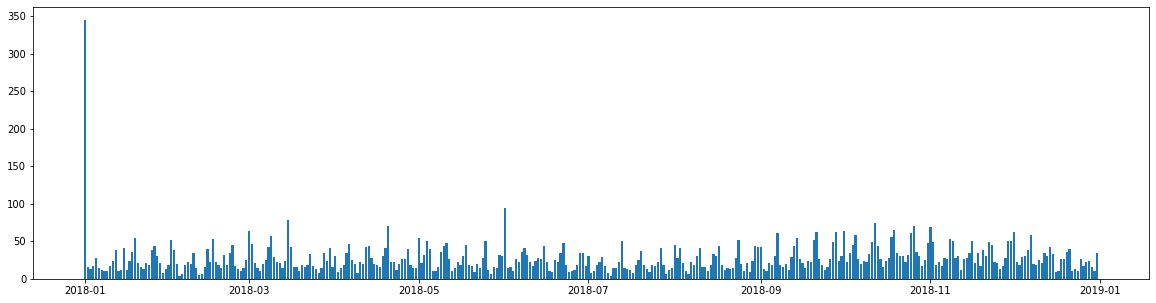

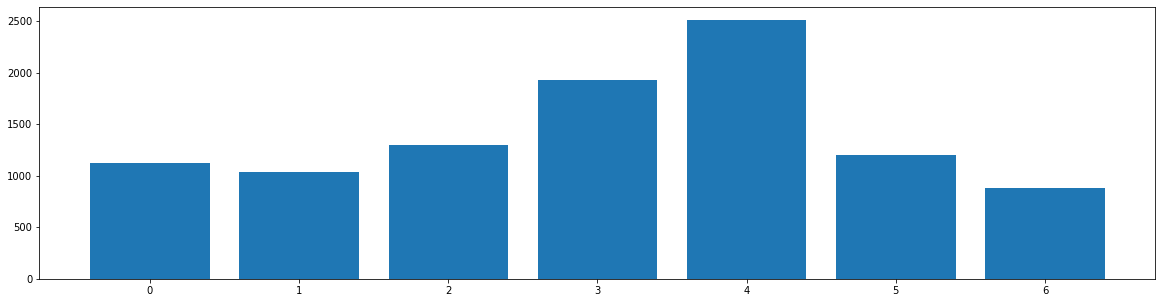

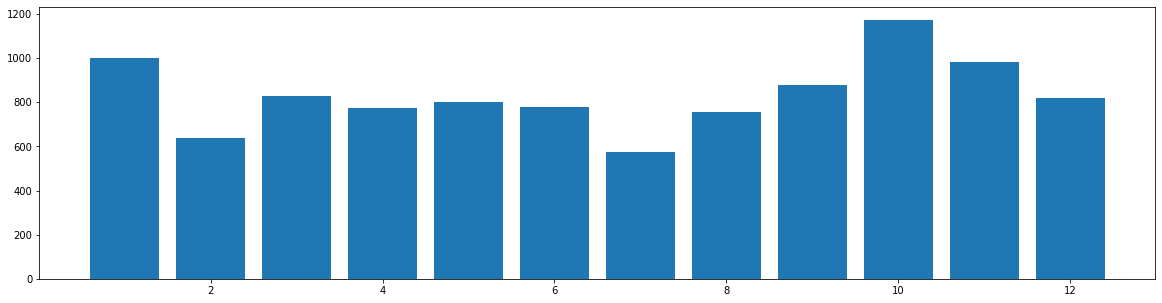

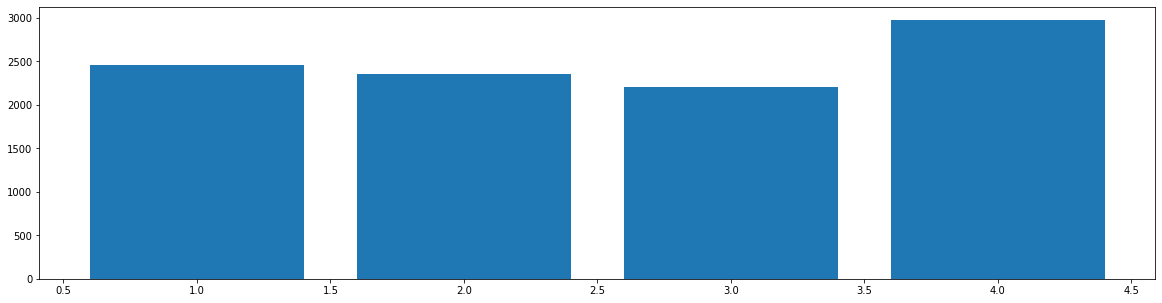

In [241]:
fig = plt.figure(figsize=(20,5))
plt.bar(df_reduced['release_date'].value_counts().index, df_reduced['release_date'].value_counts());

fig = plt.figure(figsize=(20,5))
plt.bar(df_reduced['day_of_week'].value_counts().index, df_reduced['day_of_week'].value_counts());

fig = plt.figure(figsize=(20,5))
plt.bar(df_reduced['month'].value_counts().index, df_reduced['month'].value_counts());

fig = plt.figure(figsize=(20,5))
plt.bar(df_reduced['quarter'].value_counts().index, df_reduced['quarter'].value_counts());

In [242]:
df_reduced['en_int_lang'] = df_reduced['original_language_x'].map(lambda x: x if x == 'en' else 'int')

df_reduced['collection'] = df_reduced['belongs_to_collection'].map(lambda x: 'Collection' if x is not None else 'Non_Collection')


In [243]:
df_reduced.to_csv('Movies2018_cleaned.csv', index = None, header=True)